In [1]:
from google.colab import files
import pandas as pd

# Upload CSV file
uploaded = files.upload()

Saving spam.csv to spam.csv


In [7]:
import pandas as pd

# Specifying the encoding
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
# Check the structure of the dataframe
print(df.info())

# Display the column names
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None
Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [10]:
# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

# Rename the columns
df.columns = ['label', 'message']

In [11]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
print(df.head())

   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


In [12]:
from sklearn.model_selection import train_test_split

X = df['message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')

Training data shape: (4457,)
Test data shape: (1115,)


In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

spam_detector = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

# Train the model
spam_detector.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict the labels for the test set
y_pred = spam_detector.predict(X_test)

In [15]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9623


In [16]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[965   0]
 [ 42 108]]


In [17]:
# Display the classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [20]:
# Test with a new message
new_messages = [
    "Congratulations! You've won a $1,000 Walmart gift card. Go to http://bit.ly/123456 to claim now.",
    "Hi John, are we still meeting for lunch tomorrow?"
]

predictions = spam_detector.predict(new_messages)
print(predictions) # 1 = Spam, 0 = Not Spam

[1 0]


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

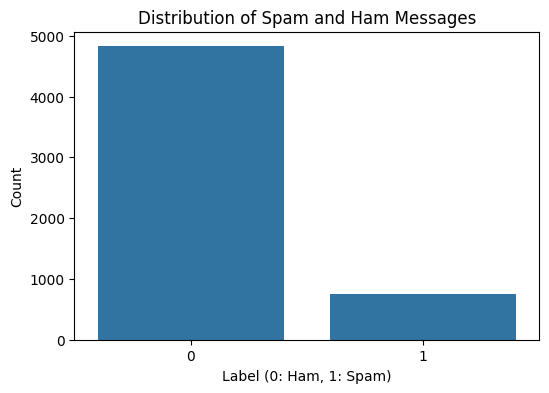

In [22]:
# Plot the distribution of spam and ham messages
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df)
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Label (0: Ham, 1: Spam)')
plt.ylabel('Count')
plt.show()

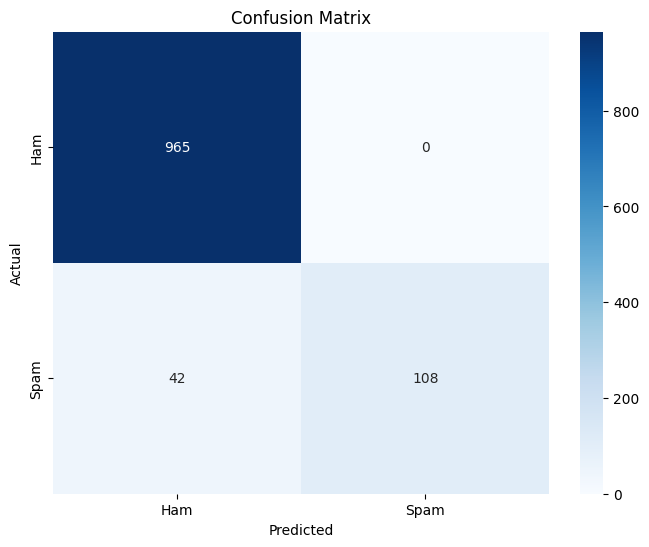

In [23]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [25]:
# Function to display sample emails
def display_samples(data, label, num_samples=5):
    samples = data[data['label'] == label]['message'].sample(num_samples, random_state=42)
    for i, message in enumerate(samples, 1):
        print(f'--- Message {i} ---')
        print(message)
        print()

# Display sample spam messages
print("Sample Spam Messages:")
display_samples(df, label=1)

# Display sample ham messages
print("Sample Ham Messages:")
display_samples(df, label=0)

Sample Spam Messages:
--- Message 1 ---
Summers finally here! Fancy a chat or flirt with sexy singles in yr area? To get MATCHED up just reply SUMMER now. Free 2 Join. OptOut txt STOP Help08714742804

--- Message 2 ---
This is the 2nd time we have tried 2 contact u. U have won the 750 Pound prize. 2 claim is easy, call 08718726970 NOW! Only 10p per min. BT-national-rate 

--- Message 3 ---
Get ur 1st RINGTONE FREE NOW! Reply to this msg with TONE. Gr8 TOP 20 tones to your phone every week just å£1.50 per wk 2 opt out send STOP 08452810071 16

--- Message 4 ---
Ur cash-balance is currently 500 pounds - to maximize ur cash-in now send GO to 86688 only 150p/msg. CC: 08718720201 PO BOX 114/14 TCR/W1

--- Message 5 ---
Last Chance! Claim ur å£150 worth of discount vouchers today! Text SHOP to 85023 now! SavaMob, offers mobile! T Cs SavaMob POBOX84, M263UZ. å£3.00 Sub. 16

Sample Ham Messages:
--- Message 1 ---
I am late,so call you tomorrow morning.take care sweet dreams....u and me...ummif

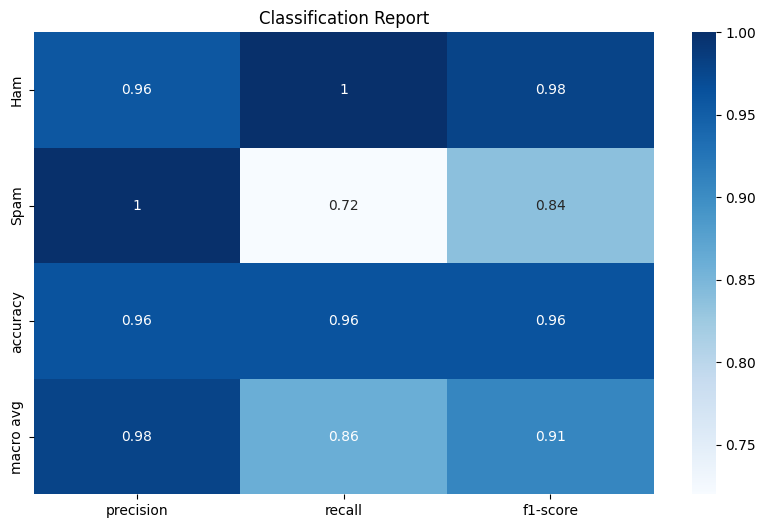

In [26]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate the classification report
class_report = classification_report(y_test, y_pred, target_names=['Ham', 'Spam'], output_dict=True)

# Convert classification report to a dataframe
class_report_df = pd.DataFrame(class_report).transpose()

# Plot the classification report
plt.figure(figsize=(10,6))
sns.heatmap(class_report_df.iloc[:-1, :-1], annot=True, cmap='Blues')
plt.title('Classification Report')
plt.show()